# Pivot Tables

## Titanic dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Manually construct pivot table

In [4]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [5]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

/tmp/ipykernel_119205/2603839867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
titanic.groupby(['sex', 'class'], observed=True)['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Pivot Table Syntax

In [8]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

/tmp/ipykernel_119205/619644514.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [9]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean', observed=False)

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


## Multilevel Pivot Tables

In [11]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class', observed=False)

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [14]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'], observed=False)

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

## aggfunc option

In [17]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':sum, 'fare': 'mean'}, 
                    observed=False)

/tmp/ipykernel_119205/3197013476.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  titanic.pivot_table(index='sex', columns='class',


fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [18]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':'sum', 'fare': 'mean'}, 
                    observed=False)

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

## Add totals to columns and rows

In [20]:
titanic.pivot_table('survived', index='sex', columns='class', 
                    margins=True,
                    observed=False)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


# Example: Birthrate Data

In [21]:
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [22]:
births['decade'] = 10 * (births['year'] // 10) 
births.pivot_table('births', index='decade', columns='gender', 
                   aggfunc='sum', observed=False)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


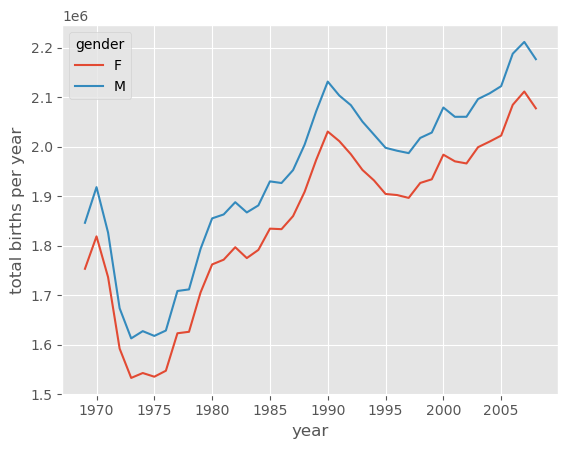

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
births.pivot_table(
    'births', index='year', columns='gender', aggfunc='sum'
).plot()
plt.ylabel('total births per year');

## Other stuff

## Removing outliers with _sigma clipping_

In [26]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[1])

In [28]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

Next we set the day column to integers; previously it had been a string column because some columns in the dataset contained the value 'null':

In [30]:
births.loc[:,'day'] = births['day'].astype(int)

In [32]:
births.index = pd.to_datetime(10000 * births.year + 
                             100 * births.month + 
                             births.day, format='%Y%m%d')
births.loc[:,'dayofweek'] = births.index.dayofweek

Text(0, 0.5, 'mean births by day')

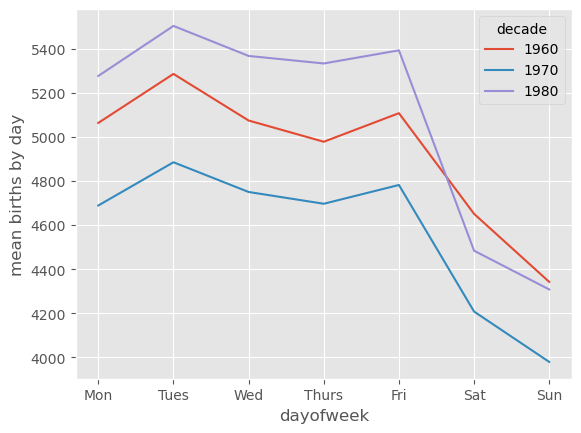

In [33]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

births.pivot_table('births', index='dayofweek', columns='decade', 
                  aggfunc='mean', observed=False).plot()
plt.gca().set(xticks=range(7), 
             xticklabels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day')

In [34]:
births_by_date = births.pivot_table('births', 
                                   [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [35]:
from datetime import datetime

In [37]:
births_by_date.index = [datetime(2012, month, day) 
                        for (month, day) in births_by_date.index]
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


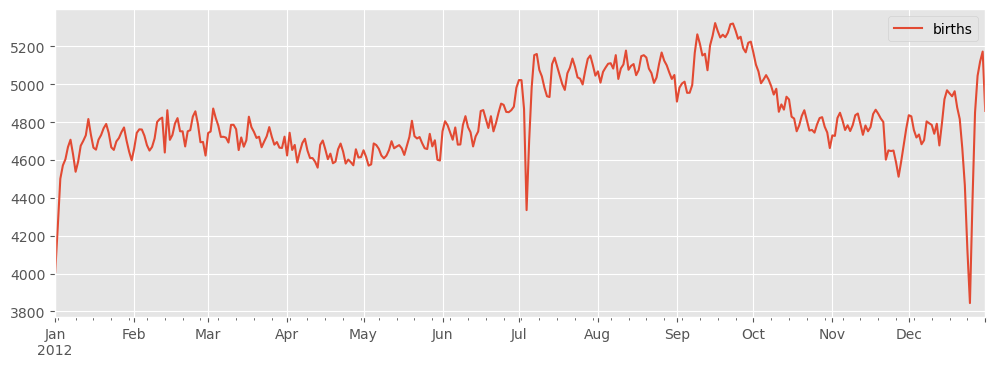

In [39]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax);